In [1]:

# Machine Learning - Supervised Learning - Classification Algorithms
# Classification algorithms are used when dependent variable(y) is non
# numerical and either Binary or Multinomial(more than 2 levels/groups)
# Classification ALgorithms - Binary Logistic Regression explains the
# relationship between a binary(yes/no) dependent variable(y) and 
# multiple independent variables (X's).
# Binary Logistic Regression is an equation.
# exp^B0+B1X1+B2X2+B3X3+...........+BnXn
# p = --------------------------------------------- or p=1/(1+exp(-Z))
# 1+ exp^B0+B1X1+B2X2+B3X3+...........+BnXn Z=B0+B1X1+...BnXn
# p - probability lies between 0 and 1. Classification predicted probability
# exp - exponential or 2.7138
# B0 - intercept or constant
# B1,B2,B3,...Bn -Coefficients
# X1,X2,X3,...Xn -Independent Variables
# Classification Rule for all classification algorithms (Binary)
# probability >=0.50 ---- 1(yes)
# probability <0.50 ---- 0(no)
# Assumptions
# 1) Logical linear relationship between dependent variable and independnet
# variables
# 2) No Multicollinearity
# 3) Sample Size required is minimum 50 observations per variable
# Interpretation of Output
# Primary metric is Accuracy which is calculated from Confusion Matrix
# Confusion Matrix is a 2 X 2 cross tabulation of Actual Class and 
# Predicted Class.
# Actual Positive and Predicted Positive - True Positive
# Actual Positive and Predicted Negative - False Negative (Type II Error)
# Actual Negative and Predicted Positive - False Positive (Type I Error)
# Actual Negative and predicted Negative - True Negative
# Type II Error means PAtient has Covid but RTPCR Test gave Negative result
# Type I Error means Pateint has no covid but RTPCR Test gave Positive 
# result.
# Python Output
# model.score(X,y) - Accuracy which is calculated from ConfusionMatrix
# intercept + Coefficients
# Other metrics using Classification_report - Sensitivity, F1 Score ,
# Precision, etc.

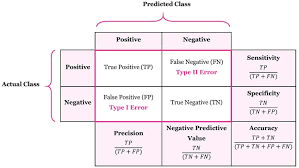

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import io
%cd "C:\Users\chkee\Downloads\Imarticus Learning\Python"

C:\Users\chkee\Downloads\Imarticus Learning\Python


In [4]:
hrtrain=pd.read_csv("train_hranalytics.csv")

In [5]:
hrtest=pd.read_csv("test_hranalytics.csv")

In [6]:
hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
# As similar variables has missing values we concatnate the data to test data
#add dependent variable to test temporarily
hrtest['is_promoted']='test'

In [9]:
combinedf=pd.concat([hrtrain,hrtest],axis=0)

In [10]:
objcols=combinedf[['department','region', 'education', 'gender',
                   'recruitment_channel','KPIs_met >80%', 'awards_won?','is_promoted','previous_year_rating']]

In [11]:
numcols=combinedf[['no_of_trainings', 'age','avg_training_score','length_of_service']]

In [12]:
#concat both dataframes
combinedf=pd.concat([hrtrain,hrtest],axis=0)

In [13]:
# education and previous year rating has missing values
combinedf.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [14]:
# gives the count of all the columns in descending order in order to understand the most frequent value
for i in objcols.columns:
    freq=objcols[i].value_counts(dropna =False)
    print(freq)

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64
region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64
Bachelor's          52247
Master's & above    21429
N

In [15]:
#most_frequent imputation
# all the nan are replaced with most frequent values
for i in objcols.columns:
    objcols[i]=objcols[i].fillna(objcols[i].value_counts().idxmax())
    
#idxmax-index maximum-its the index corresponding to max frequency or most frequent.
#it imputes the most repeated value in nan position

In [16]:
objcols.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'KPIs_met >80%', 'awards_won?', 'is_promoted', 'previous_year_rating'],
      dtype='object')

In [17]:
#Encoding-label and getdummies
#Whenerver there is regression data we do  getdummies encoding
#dummy encoding only on independent variables(x)
#Label encoding is done only on dependent variable(Y) in classification only

objcols_dummy=pd.get_dummies(objcols,columns=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'KPIs_met >80%', 'awards_won?', 'previous_year_rating'])

In [18]:
objcols_dummy.shape

(78298, 61)

In [19]:
objcols_dummy.head()

,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,...,recruitment_channel_sourcing,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,0,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [20]:
#combine both dataframes-column concatination
combinedf_clean=pd.concat([numcols,objcols_dummy],axis=1)

In [21]:
combinedf_clean.head()

,no_of_trainings,age,avg_training_score,length_of_service,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,recruitment_channel_sourcing,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,1,35,49,8,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
1,1,30,60,4,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,1,34,50,7,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
3,2,39,50,10,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,1,45,73,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [22]:
hrtrain_df=combinedf_clean[combinedf_clean.is_promoted!='test']
hrtest_df=combinedf_clean[combinedf_clean.is_promoted=='test']

In [23]:
hrtest_df=hrtest_df.drop('is_promoted',axis=1)

In [24]:
# to check excel output
X=hrtrain_df[['no_of_trainings', 'age','avg_training_score','length_of_service']]
y=hrtrain_df.is_promoted

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
y=le.fit_transform(y)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logit=LogisticRegression()

In [30]:
logitmodel=logit.fit(X,y)

In [31]:
logitmodel.score(X,y)  #Accuracy from confusion matrix

0.9148299518318493

In [32]:
logitmodel.intercept_

array([-5.06231887])

In [33]:
pd.DataFrame(logitmodel.coef_,columns=X.columns)

,no_of_trainings,age,avg_training_score,length_of_service
0,-0.244386,-0.005327,0.047163,0.002718


In [34]:
logit_predict=logitmodel.predict(X)

In [35]:
pd.crosstab(y,logit_predict)  #confusion matrix

col_0,0
row_0,
0,50140
1,4668


In [36]:
X=hrtrain_df.drop('is_promoted',axis=1)

In [37]:
#convergence warning- is that all the coefficients are not calculated in the equation
#Solution-increase the iterations or scale the independent variables
logit=LogisticRegression(max_iter=2000)

In [38]:
logitmodel=logit.fit(X,y)

In [39]:
logitmodel.score(X,y)  #Accuracy from confusion matrix

0.9317982776237046

In [40]:
logitpredict=logitmodel.predict(X)

In [41]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,49834,306
1,3432,1236


In [42]:
logitmodel.score(X,y)

0.9317982776237046

In [43]:
(49834+1230)/(49834+306+3432+1236)  #accuracy

0.9316888045540797

In [44]:
#Senstivity/recall=TP/(TP+FN)
1236/(3432+1236)

0.2647814910025707

In [45]:
#Specifity=TN/(TN+FP)
49834/(49834+306)

0.9938970881531711

In [46]:
#Precision-TP/(TP+FP)
1236/(1236+306)

0.8015564202334631

In [47]:
#F1 SCORE=2*((Precision*recall)/(Precision+recall))
2*((0.801556*0.264781/(0.801556+0.264781)))

0.39806702615777184

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y,logitpredict))

# imbalace in data or imbalance in dependent variable classes
# 0-50140 (Majoroty class)
# 1_4668  (Minority class)

# Minority class predicition is worst.

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     50140
           1       0.80      0.26      0.40      4668

    accuracy                           0.93     54808
   macro avg       0.87      0.63      0.68     54808
weighted avg       0.92      0.93      0.92     54808



In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
tree=DecisionTreeClassifier(max_depth=12)

In [52]:
treemodel=tree.fit(X,y)

In [53]:
treemodel.score(X,y)  #overfitting value is near to 1

0.9448620639322727

In [66]:
tree_predict=treemodel.predict(X)

In [54]:
tree_test_pred=treemodel.predict(hrtest_df)

In [55]:
pd.DataFrame(tree_test_pred).to_csv("hr.csv")

In [67]:
print(classification_report(y,tree_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     50140
           1       0.98      0.36      0.53      4668

    accuracy                           0.94     54808
   macro avg       0.96      0.68      0.75     54808
weighted avg       0.95      0.94      0.93     54808



In [56]:
#RANDOM FOREST REGRESSION

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf=RandomForestClassifier()

In [59]:
rfmodel=rf.fit(X,y)

In [60]:
rfmodel.score(X,y)

0.9997080718143336

In [69]:
rf_predict=rfmodel.predict(X)

In [70]:
print(classification_report(y,rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50140
           1       1.00      1.00      1.00      4668

    accuracy                           1.00     54808
   macro avg       1.00      1.00      1.00     54808
weighted avg       1.00      1.00      1.00     54808



In [ ]:
rf_test_predict=rfmodel.predict(hrtest_df)

In [ ]:
pd.DataFrame(rf_test_predict).to_csv('randomforesthr.csv')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm=GradientBoostingClassifier()

In [ ]:
gbm_model=gbm.fit(X,y)

In [ ]:
gbm_model.score(X,y)

In [ ]:
cross_val_score(gbm,X,y)

In [ ]:
np.mean([0.93942711, 0.93814997, 0.94006568, 0.94124624, 0.93951282])

In [ ]:
gbm_test_predict=gbm_model.predict(hrtest_df)

In [ ]:
pd.DataFrame(gbm_test_predict).to_csv('gbm.csv')

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
nb=CategoricalNB()

In [ ]:
nb_model=nb.fit(X,y)

In [ ]:
nb_model.score(X,y)

In [ ]:
nb_test_predict=nb_model.predict(hrtest_df)

In [ ]:
pd.DataFrame(nb_test_predict).to_csv('nb.csv')